# Statistic Study

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.cluster

In [3]:
def otsu_threshold(y, bins=256):
    y = np.clip(y, 0, 1)
    hist, bin_edges = np.histogram(y, bins=bins, range=(0,1))
    p = hist.astype(float) / hist.sum()
    omega = np.cumsum(p)
    mu = np.cumsum(p * (bin_edges[:-1] + bin_edges[1:]) / 2.0)
    mu_t = mu[-1]
    sigma_b2 = (mu_t*omega - mu)**2 / (omega*(1 - omega) + 1e-12)
    idx = np.nanargmax(sigma_b2)
    return (bin_edges[idx] + bin_edges[idx+1]) / 2.0

def baseline_otsu_quantile(y, q=0.10):
    t_otsu = otsu_threshold(y)
    signal = y[y >= t_otsu]
    if len(signal) < 5: 
        return t_otsu
    return float(np.quantile(signal, q))  

In [32]:
c = np.random.randint(0, 10, 100)

In [43]:
s = int(input())
e = int(input())
c = int(input())
c = np.append(a, np.random.randint(s,e,c))

7
12
150


In [44]:
c = c/100

In [15]:
import numpy as np

def baseline_kmeans_quantile_np(y, q=0.10, max_iter=100, random_state=0):
    y = np.asarray(y, dtype=float).ravel()
    y = y[np.isfinite(y)]

    rng = np.random.default_rng(random_state)
    c = np.quantile(y, [0.3, 0.7]).astype(float)

    for _ in range(max_iter):
        dist0 = np.abs(y - c[0])
        dist1 = np.abs(y - c[1])
        labels = (dist1 < dist0).astype(int)

        c_new = np.array([
            y[labels == 0].mean() if np.any(labels == 0) else c[0],
            y[labels == 1].mean() if np.any(labels == 1) else c[1],
        ])

        if np.allclose(c_new, c, atol=1e-8):
            break
        c = c_new

    hi = int(np.argmax(c))
    signal = y[labels == hi]
    if signal.size == 0:
        return float(np.quantile(y, q))
    return float(np.quantile(signal, q))


## plot의 순서는 함수의 호출 순서와 상동함

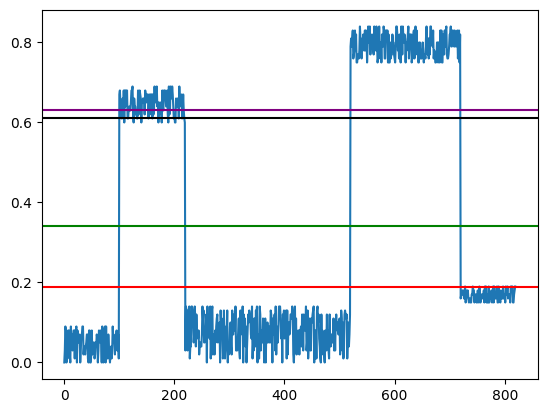

In [30]:
def draw_plot(a):
    plt.plot(a)
    plt.axhline(baseline_kmeans_quantile_np(a), color='purple')
    plt.axhline(baseline_otsu_quantile(a), color='black')
    plt.axhline(np.mean(a), color='green')
    plt.axhline(otsu_threshold(a), color='red')
    
draw_plot(a)

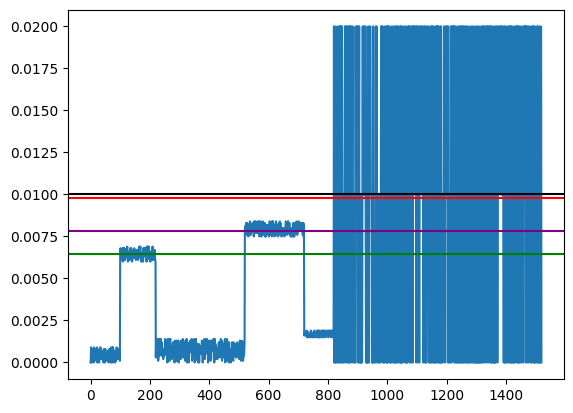

In [31]:
draw_plot(b)
#상단부터 블랙/레드/퍼플/그린 순임

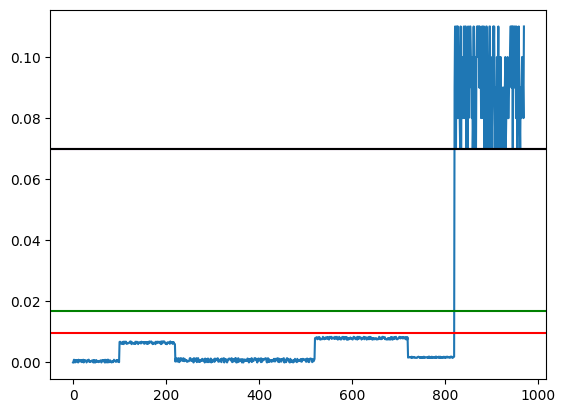

In [45]:
draw_plot(c)
#상단부터 블랙/그린/레드 순임.